In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv
/kaggle/input/widsdatathon2024-challenge1/training.csv
/kaggle/input/widsdatathon2024-challenge1/test.csv


In [2]:
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

If you want to see all the columns in the dataset

In [3]:
pd.set_option('display.max_columns', 10000) 

pd.set_option('display.max_rows', 10000)

In [4]:
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")

In [5]:
train.shape

(12906, 83)

In [6]:
train.head(15)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.878790,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.683330,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.325580,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,

In [7]:
train.isna().sum()

patient_id                                   0
patient_race                              6385
payer_type                                1803
patient_state                               51
patient_zip3                                 0
patient_age                                  0
patient_gender                               0
bmi                                       8965
breast_cancer_diagnosis_code                 0
breast_cancer_diagnosis_desc                 0
metastatic_cancer_diagnosis_code             0
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
Region                                      52
Division                                    52
population                                   1
density                                      1
age_median                                   1
age_under_10                                 1
age_10_to_19                                 1
age_20s                                      1
age_30s      

In [8]:
train.drop(['patient_id','metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment', 'home_value'],axis = 1, inplace = True)

In [9]:
train['patient_race'] = train['patient_race'].fillna('other')
train['payer_type'] = train['payer_type'].fillna('other')
train['patient_state'] = train['patient_state'].fillna('unidentified')
train['Region'] = train['Region'].fillna('unidentified')
train['Division'] = train['Division'].fillna('unidentified')

In [10]:
avg_value = train['bmi'].mean()
avg_value = train['Ozone'].mean()
avg_value = train['PM25'].mean()
avg_value = train['N02'].mean()

In [11]:
train['bmi'].fillna(avg_value, inplace=True)
train['Ozone'].fillna(avg_value, inplace=True)
train['PM25'].fillna(avg_value, inplace=True)
train['N02'].fillna(avg_value, inplace=True)

In [12]:
train = train.apply(lambda col: col.fillna(col.mode()[0]))

In [13]:
train.isna().sum()

patient_race                        0
payer_type                          0
patient_state                       0
patient_zip3                        0
patient_age                         0
patient_gender                      0
bmi                                 0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
Region                              0
Division                            0
population                          0
density                             0
age_median                          0
age_under_10                        0
age_10_to_19                        0
age_20s                             0
age_30s                             0
age_40s                             0
age_50s                             0
age_60s                             0
age_70s                             0
age_over_80                         0
male                                0
female                              0
married     

In [14]:
train.head()

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,other,MEDICAID,CA,924,84,F,16.098988,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,White,COMMERCIAL,CA,928,62,F,28.490000,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,White,COMMERCIAL,TX,760,43,F,38.090000,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,White,COMMERCIAL,CA,926,45,F,16.098988,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,55336.28571,59.22142

In [15]:
cols = ['patient_race', 'payer_type', 'patient_state', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'Region', 'Division' ]

for i in cols:
  label_encoder = LabelEncoder()
  train[i] = label_encoder.fit_transform(train[i])

In [16]:
train = train.round(2)

In [17]:
train.head(10)

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,5,1,4,924,84,0,16.10,48,42,41,3,5,31437.75,1189.56,30.64,16.01,15.54,17.61,14.01,11.61,11.56,7.57,4.00,2.10,49.86,50.14,36.57,11.89,47.11,4.44,3.93,52.23,52996.29,3.14,4.00,6.16,5.14,6.27,10.14,13.30,20.00,12.74,11.57,7.53,19.10,24563.57,44.59,8674.50,1165.00,37.44,33.26,29.20,25.91,8.36,3.26,11.61,39.56,61.53,8.47,13.43,0.00,44.10,13.10,5.10,1.49,0.34,27.11,8.76,66.69,12.87,22.54,10.10,27.81,11.20,3.50,52.24,8.65,18.61,1
1,4,0,4,928,62,0,28.49,29,12,3,3,5,39121.88,2295.94,38.20,11.88,13.35,14.23,13.42,13.33,14.06,10.25,5.95,3.50,49.89,50.11,50.25,9.83,35.29,4.65,3.62,61.74,102741.64,2.33,1.54,2.65,2.18,2.41,5.16,7.97,13.94,12.47,19.76,29.60,49.36,41287.27,61.46,11725.67,2003.12,34.75,14.23,19.99,29.80,23.74,12.25,35.98,47.92,65.23,5.10,15.22,0.03,54.03,2.53,20.83,0.59,0.30,11.65,10.08,37.95,8.96,10.11,8.06,30.61,7.02,4.10,42.30,8.49,20.11,1
2,4,0,43,760,43,0,38.09,18,23,3,2,8,21996.68,626.24,37.91,13.03,14.46,12.53,13.54,12.86,12.77,11.43,6.56,2.81,50.12,49.88,55.75,12.33,27.20,4.71,3.26,55.80,85984.74,2.48,1.30,2.72,2.94,2.77,6.76,12.06,15.84,13.56,20.88,18.68,39.56,40399.03,72.74,7786.58,1235.91,29.36,10.81,27.04,32.37,19.68,10.12,29.79,37.31,66.43,4.56,13.72,3.65,75.82,9.23,3.62,0.46,0.15,3.82,6.90,19.37,11.25,9.66,3.36,31.39,15.07,7.45,40.11,7.64,14.84,1
3,4,0,4,926,45,0,16.10,22,4,3,3,5,32795.33,1896.22,42.87,10.07,12.14,12.54,12.46,12.65,14.85,12.28,8.22,4.76,49.07,50.93,52.60,11.62,31.14,4.62,3.10,54.56,120533.83,3.44,1.27,2.18,2.21,2.10,4.38,5.89,10.90,10.72,18.85,38.06,56.91,55336.29,59.22,12171.30,2354.74,32.03,5.84,12.15,26.27,33.29,22.46,55.75,48.94,64.43,5.26,18.50,0.05,65.01,1.44,18.85,0.43,0.25,5.43,8.61,16.72,8.85,8.69,5.28,27.56,4.40,4.81,42.07,7.23,15.89,0
4,5,0,13,836,55,0,16.10,7,18,3,3,3,10886.26,116.89,43.47,10.82,13.98,9.49,10.36,12.60,14.99,14.84,9.46,3.47,52.31,47.69,57.88,14.96,21.76,5.41,3.35,47.21,61075.13,2.59,1.96,3.17,3.24,4.78,11.46,15.66,22.43,12.48,13.62,8.61,22.23,29073.18,77.10,3768.06,919.74,27.03,11.58,29.59,39.17,13.98,5.68,19.66,42.33,57.49,4.26,13.03,6.89,86.71,0.43,0.66,0.76,0.11,5.08,6.26,13.33,15.28,11.22,1.95,26.17,12.09,13.11,41.36,4.11,11.72,0
5,4,2,33,141,66,0,16.10,7,18,39,1,2,5643.77,219.36,45.18,8.51,14.86,11.09,9.75,13.61,13.37,15.69,9.45,3.65,50.91,49.09,51.32,11.76,30.83,6.09,2.91,54.77,71005.10,1.51,1.09,3.59,3.38,4.08,7.15,11.90,21.91,14.50,19.49,11.40,30.89,35780.84,83.87,2368.94,794.62,26.65,8.30,36.88,29.07,15.87,9.87,25.74,43.08,60.93,3.88,7.07,1.65,93.53,1.03,0.42,0.74,0.00,1.00,3.26,2.47,13.72,8.89,0.64,25.00,4.80,7.75,40.11,6.18,13.56,0
6,5,0,4,900,51,0,29.05,47,44,7,3,5,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.12,7.84,10.16,14.42,10.48,13.73,18.96,32.69,360

<Axes: >

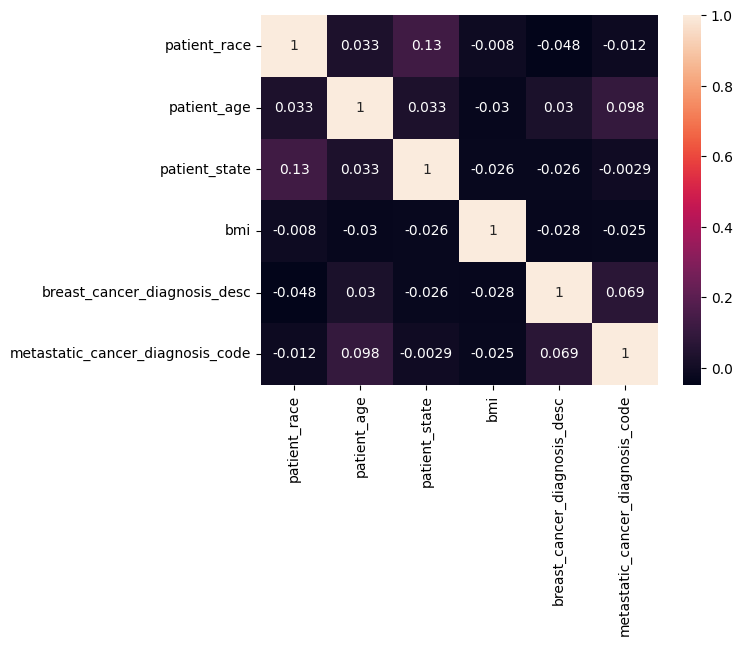

In [18]:
patient_columns = ['patient_race', 'patient_age','patient_state', 'bmi', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code']

sns.heatmap(train[patient_columns].corr(), annot=True,
            xticklabels=patient_columns, yticklabels=patient_columns)

In [19]:
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")

In [20]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,Midwest,East North Central,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,11.625806,11.208065,15.619355,12.322581,8.409677,3.343548,49.154839,50.845161,55.175806,13.982258,24.266129,6.583871,3.073226,52.980645,66187.22807,1.611290,1.277419,2.645161,3.853226,3.172581,13.275806,12.633871,21.485484,16.717742,15.238710,8.070968,23.309677,33553.43333,84.112903,2064.741935,152749.5370,825.122449,23.895455,12.429032,40.667742,28.959677,11.895161,6.046774,17.941935,35.591379,63.303226,3.406557,10.655357,5.551786,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C787,NaN,NaN,South,South Atlantic,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,11.302564,10.971795,15.823077,15.902564,11.828205,6.815385,49.658974,50.341026,44.800000,17.779487,29.102564,8.310256,2.917105,46.665789,64711.71053,3.873684,2.044737,3.807895,4.239474,4.242105,9.347368,13.018421,17.373684,12.889474,14.442105,14.702632,29.144737,34678.61538,68.673684,8502.230769,265860.6053,1343.394737,34.957895,8.379487,26.558974,30.200000,22.100000,12.764103,34.864103,43.250000,57.035897,5.002632,11.564103,0.005128,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.528261,2.897826,2.747826,3.173913,6.647826,9.617391,15.965217,13.589130,19.752174,21.847826,41.600000,34317.82609,61.397826,12609.260870,572606.5000,1778.000000,34.595652,17.491304,22.656522,29.263043,20.200000,10.404348,30.604348,46.208696,63.154348,6.197826,15.708696,0.015217,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C779,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.6

In [21]:
test = test.apply(lambda col: col.fillna(col.mode()[0]))

In [22]:
test.isna().sum()

patient_id                               0
patient_race                             0
payer_type                               0
patient_state                            0
patient_zip3                             0
patient_age                              0
patient_gender                           0
bmi                                      0
breast_cancer_diagnosis_code             0
breast_cancer_diagnosis_desc             0
metastatic_cancer_diagnosis_code         0
metastatic_first_novel_treatment         0
metastatic_first_novel_treatment_type    0
Region                                   0
Division                                 0
population                               0
density                                  0
age_median                               0
age_under_10                             0
age_10_to_19                             0
age_20s                                  0
age_30s                                  0
age_40s                                  0
age_50s    

In [23]:
test.drop(['patient_id','metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment', 'home_value'],axis = 1, inplace = True)

In [24]:
test['patient_race'] = train['patient_race'].fillna('other')
test['payer_type'] = train['payer_type'].fillna('other')
test['patient_state'] = train['patient_state'].fillna('unidentified')
test['Region'] = train['Region'].fillna('unidentified')
test['Division'] = train['Division'].fillna('unidentified')

In [25]:
avg_value = test['bmi'].mean()
avg_value = test['Ozone'].mean()
avg_value = test['PM25'].mean()
avg_value = test['N02'].mean()

In [26]:
test['bmi'].fillna(avg_value, inplace=True)
test['Ozone'].fillna(avg_value, inplace=True)
test['PM25'].fillna(avg_value, inplace=True)
test['N02'].fillna(avg_value, inplace=True)

In [27]:
test.head()

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,5,1,4,467,54,F,40.0,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,3,5,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,11.625806,11.208065,15.619355,12.322581,8.409677,3.343548,49.154839,50.845161,55.175806,13.982258,24.266129,6.583871,3.073226,52.980645,66187.22807,1.611290,1.277419,2.645161,3.853226,3.172581,13.275806,12.633871,21.485484,16.717742,15.238710,8.070968,23.309677,33553.43333,84.112903,2064.741935,825.122449,23.895455,12.429032,40.667742,28.959677,11.895161,6.046774,17.941935,35.591379,63.303226,3.406557,10.655357,5.551786,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,4,0,4,337,52,F,40.0,C50912,Malignant neoplasm of unspecified site of left...,C787,3,5,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,11.302564,10.971795,15.823077,15.902564,11.828205,6.815385,49.658974,50.341026,44.800000,17.779487,29.102564,8.310256,2.917105,46.665789,64711.71053,3.873684,2.044737,3.807895,4.239474,4.242105,9.347368,13.018421,17.373684,12.889474,14.442105,14.702632,29.144737,34678.61538,68.673684,8502.230769,1343.394737,34.957895,8.379487,26.558974,30.200000,22.100000,12.764103,34.864103,43.250000,57.035897,5.002632,11.564103,0.005128,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,4,0,43,917,61,F,40.0,C50911,Malignant neoplasm of unsp site of right femal...,C773,2,8,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.528261,2.897826,2.747826,3.173913,6.647826,9.617391,15.965217,13.589130,19.752174,21.847826,41.600000,34317.82609,61.397826,12609.260870,1778.000000,34.595652,17.491304,22.656522,29.263043,20.200000,10.404348,30.604348,46.208696,63.154348,6.197826,15.708696,0.015217,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,4,0,4,917,64,F,40.0,C50912,Malignant neoplasm of unspecified site of left...,C779,3,5,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.528261,2.897826,2.747826,3.173913,6.647826,9.617391,15.965217,13.589130,19.752174,21.847826,41.600000,34317.82609,61.397826,12609.260870,1778.000000,34.595652,17.491304,22.656522,29.263043,20.200000,10.404348,30.604348,46.208696,63.154348,6.197826,15.708696,0.015217,

In [28]:
cols = ['patient_race', 'payer_type', 'patient_state', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'Region', 'Division' ]

for i in cols:
  label_encoder = LabelEncoder()
  test[i] = label_encoder.fit_transform(test[i])

In [29]:
test = test.round(2)

In [30]:
test.head()

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,5,1,4,467,54,0,40.0,25,6,3,3,5,5441.44,85.62,40.88,12.73,14.09,10.66,11.63,11.21,15.62,12.32,8.41,3.34,49.15,50.85,55.18,13.98,24.27,6.58,3.07,52.98,66187.23,1.61,1.28,2.65,3.85,3.17,13.28,12.63,21.49,16.72,15.24,8.07,23.31,33553.43,84.11,2064.74,825.12,23.90,12.43,40.67,28.96,11.90,6.05,17.94,35.59,63.30,3.41,10.66,5.55,94.79,0.36,0.30,0.12,0.01,0.77,3.63,3.56,14.00,7.99,0.97,24.96,10.84,8.08,38.72,7.95,11.16
1,4,0,4,337,52,0,40.0,41,38,16,3,5,19613.82,1555.11,49.11,8.07,8.59,10.68,11.30,10.97,15.82,15.90,11.83,6.82,49.66,50.34,44.80,17.78,29.10,8.31,2.92,46.67,64711.71,3.87,2.04,3.81,4.24,4.24,9.35,13.02,17.37,12.89,14.44,14.70,29.14,34678.62,68.67,8502.23,1343.39,34.96,8.38,26.56,30.20,22.10,12.76,34.86,43.25,57.04,5.00,11.56,0.01,78.22,10.89,3.45,0.19,0.08,1.84,5.33,10.26,16.02,13.60,2.84,23.95,10.58,9.30,36.92,7.84,13.60
2,4,0,41,917,61,0,40.0,40,35,3,2,8,43030.50,2048.58,38.85,11.31,12.90,14.12,13.53,13.16,13.38,11.47,6.38,3.74,49.05,50.95,48.50,10.12,36.41,4.97,3.67,59.22,86330.39,2.23,1.53,2.90,2.75,3.17,6.65,9.62,15.97,13.59,19.75,21.85,41.60,34317.83,61.40,12609.26,1778.00,34.60,17.49,22.66,29.26,20.20,10.40,30.60,46.21,63.15,6.20,15.71,0.02,38.71,3.96,25.57,1.19,0.27,18.86,11.43,47.73,9.90,10.52,12.75,32.53,7.26,3.81,47.31,9.60,20.08
3,4,0,4,917,64,0,40.0,41,38,7,3,5,43030.50,2048.58,38.85,11.31,12.90,14.12,13.53,13.16,13.38,11.47,6.38,3.74,49.05,50.95,48.50,10.12,36.41,4.97,3.67,59.22,86330.39,2.23,1.53,2.90,2.75,3.17,6.65,9.62,15.97,13.59,19.75,21.85,41.60,34317.83,61.40,12609.26,1778.00,34.60,17.49,22.66,29.26,20.20,10.40,30.60,46.21,63.15,6.20,15.71,0.02,38.71,3.96,25.57,1.19,0.27,18.86,11.43,47.73,9.90,10.52,12.75,32.53,7.26,3.81,47.31,9.60,20.08
4,5,0,13,900,40,0,23.0,25,6,7,3,3,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.12,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40,31.50,12949.12,1651.15,37.37,22.92,18.24,21.27,23.89,13.69,37.58,41.75,64.39,8.68,21.23,0.01,42.82,12.22,12.70,1.12,0.15,22.14,8.85,45.53,11.90,20.76,14.74,30.71,10.34,3.03,41.19,11.17,21.64


With a large dataset, we would drop the target variable from X to have all the other columns

In [31]:
X = train.drop('DiagPeriodL90D', axis=1)
Y = train['DiagPeriodL90D'] # target variable

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

print(len(X_train))
print(len(X_test))

9034
3872


In [32]:
lg_model = LogisticRegression()

In [33]:
lg_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = lg_model.predict(X_test)

In [35]:
lg_accuracy = accuracy_score(y_test, y_pred)

In [36]:
print(f'Accuracy: {lg_accuracy:.2f}')

Accuracy: 0.68


In [37]:
xgb_model = XGBClassifier()

In [38]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = xgb_model.predict(X_test)

In [40]:
xgb_accuracy = accuracy_score(y_test, y_pred)

In [41]:
print(f'Accuracy: {xgb_accuracy:.2f}')

Accuracy: 0.79


In [42]:
lgbm_model = LGBMClassifier()

In [43]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier()

In [44]:
y_pred = lgbm_model.predict(X_test)

In [45]:
lgbm_accuracy = accuracy_score(y_test, y_pred)

In [46]:
print(f'Accuracy: {lgbm_accuracy:.2f}')

Accuracy: 0.81
